# MPVBench_Tutorial

<img src="data/img/00MPVBench_logo.svg" alt="MPVBenchLogo" width="600"/>

This notebook offers tools and workflows to analyze power and temperature data from the **MPVBench** repository over time. The data, records from various Mini Photovoltaic (MPV) systems located in districts Karlsruhe and Pforzheim, provide real-measured MPV data insights.  For a detailed overview of the data, structure, and MPV systems, refer to the MPVBench repository's [README.md](README.md).

**⚠️ Note**: **Last update was on 13.11.2024**.

#### **Step 1: Check if files exist**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Check versions
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

# Define the paths to the CSV files
power_path = 'data/p_watt.csv'
temp_path = 'data/t_celsius.csv'

# Check if the power data file exists
if not os.path.exists(power_path):
    raise FileNotFoundError(f"File not found: {power_path}")
# Check if the temperature data file exists
if not os.path.exists(temp_path):
    raise FileNotFoundError(f"File not found: {temp_path}")

pandas version: 2.1.0
matplotlib version: 3.7.3


#### **Step 2: Load the CSV files**

In [2]:
# Load the power data CSV into a DataFrame
df_power = pd.read_csv(power_path)
# Load the temperature data CSV into a DataFrame
df_temp = pd.read_csv(temp_path)

#### **Step 3: Ensure 'time' is parsed as datetime**

In [3]:
# Convert the 'time' column in the power DataFrame to datetime objects
df_power['time'] = pd.to_datetime(df_power['time'])
# Convert the 'time' column in the temperature DataFrame to datetime objects
df_temp['time'] = pd.to_datetime(df_temp['time'])

#### **Step 4: Print the first few rows and data types of each DataFrame**

In [4]:
print("Power DataFrame:")
# Display the first five rows of the power DataFrame
print("First 5 rows:")
print(df_power.head())

# Display the last five rows of the power DataFrame
print("\nLast 5 rows:")
print(df_power.tail())

print("\nTemperature DataFrame:")
# Display the first five rows of the temperature DataFrame
print("First 5 rows:")
print(df_temp.head())

# Display the last five rows of the temperature DataFrame
print("\nLast 5 rows:")
print(df_temp.tail())

Power DataFrame:
First 5 rows:
                 time   1a        1b   2a   2b   1c
0 2024-08-01 00:00:00  0.0  0.026667  0.0  0.0  0.0
1 2024-08-01 00:15:00  0.0  0.060000  0.0  0.0  0.0
2 2024-08-01 00:30:00  0.0  0.000000  0.0  0.0  0.0
3 2024-08-01 00:45:00  0.0  0.093333  0.0  0.0  0.0
4 2024-08-01 01:00:00  0.0  0.040000  0.0  0.0  0.0

Last 5 rows:
                     time   1a      1b   2a   2b   1c
33403 2024-07-31 22:45:00  0.0  0.0000  0.0  0.0  0.0
33404 2024-07-31 23:00:00  0.0  0.0000  0.0  0.0  0.0
33405 2024-07-31 23:15:00  0.0  0.0000  0.0  0.0  0.0
33406 2024-07-31 23:30:00  0.0  0.0000  0.0  0.0  0.0
33407 2024-07-31 23:45:00  0.0  0.0525  0.0  0.0  0.0

Temperature DataFrame:
First 5 rows:
                 time         1a         1b         2a         2b         1c
0 2024-08-01 00:00:00  28.546667  28.386667  27.683333  24.996667  27.013333
1 2024-08-01 00:15:00  28.773333  28.490000  27.653333  25.110000  26.633333
2 2024-08-01 00:30:00  28.960000  28.476667  27.55

#### **Step 5: Calculate mean values for the specified date range**

In [5]:
# Define the date range
start_date = '2024-10-24'
end_date = '2024-10-31'
# Convert the date strings to datetime objects
start_date_dt = pd.to_datetime(start_date, format='%Y-%m-%d')
end_date_dt = pd.to_datetime(end_date, format='%Y-%m-%d')
# Calculate the difference in days
date_difference = (end_date_dt - start_date_dt).days

# Filter the DataFrames for the specified date range
mask_power = (df_power['time'] >= start_date) & (df_power['time'] <= end_date)
mask_temp = (df_temp['time'] >= start_date) & (df_temp['time'] <= end_date)

# Calculate mean values for the filtered power DataFrame
mean_power_range = df_power.loc[mask_power].mean(numeric_only=True)
print(f"\nMean values for Power DataFrame from {start_date} to {end_date}:")
print(mean_power_range)

# Calculate mean values for the filtered temperature DataFrame
mean_temp_range = df_temp.loc[mask_temp].mean(numeric_only=True)
print(f"\nMean values for Temperature DataFrame from {start_date} to {end_date}:")
print(mean_temp_range)


Mean values for Power DataFrame from 2024-10-24 to 2024-10-31:
1a    35.016449
1b    45.483929
2a    19.881857
2b    26.287969
1c    69.047152
dtype: float64

Mean values for Temperature DataFrame from 2024-10-24 to 2024-10-31:
1a    24.206654
1b    20.223452
2a    16.008358
2b    13.921912
1c    14.745599
dtype: float64


#### **Step 6: Plot the data**

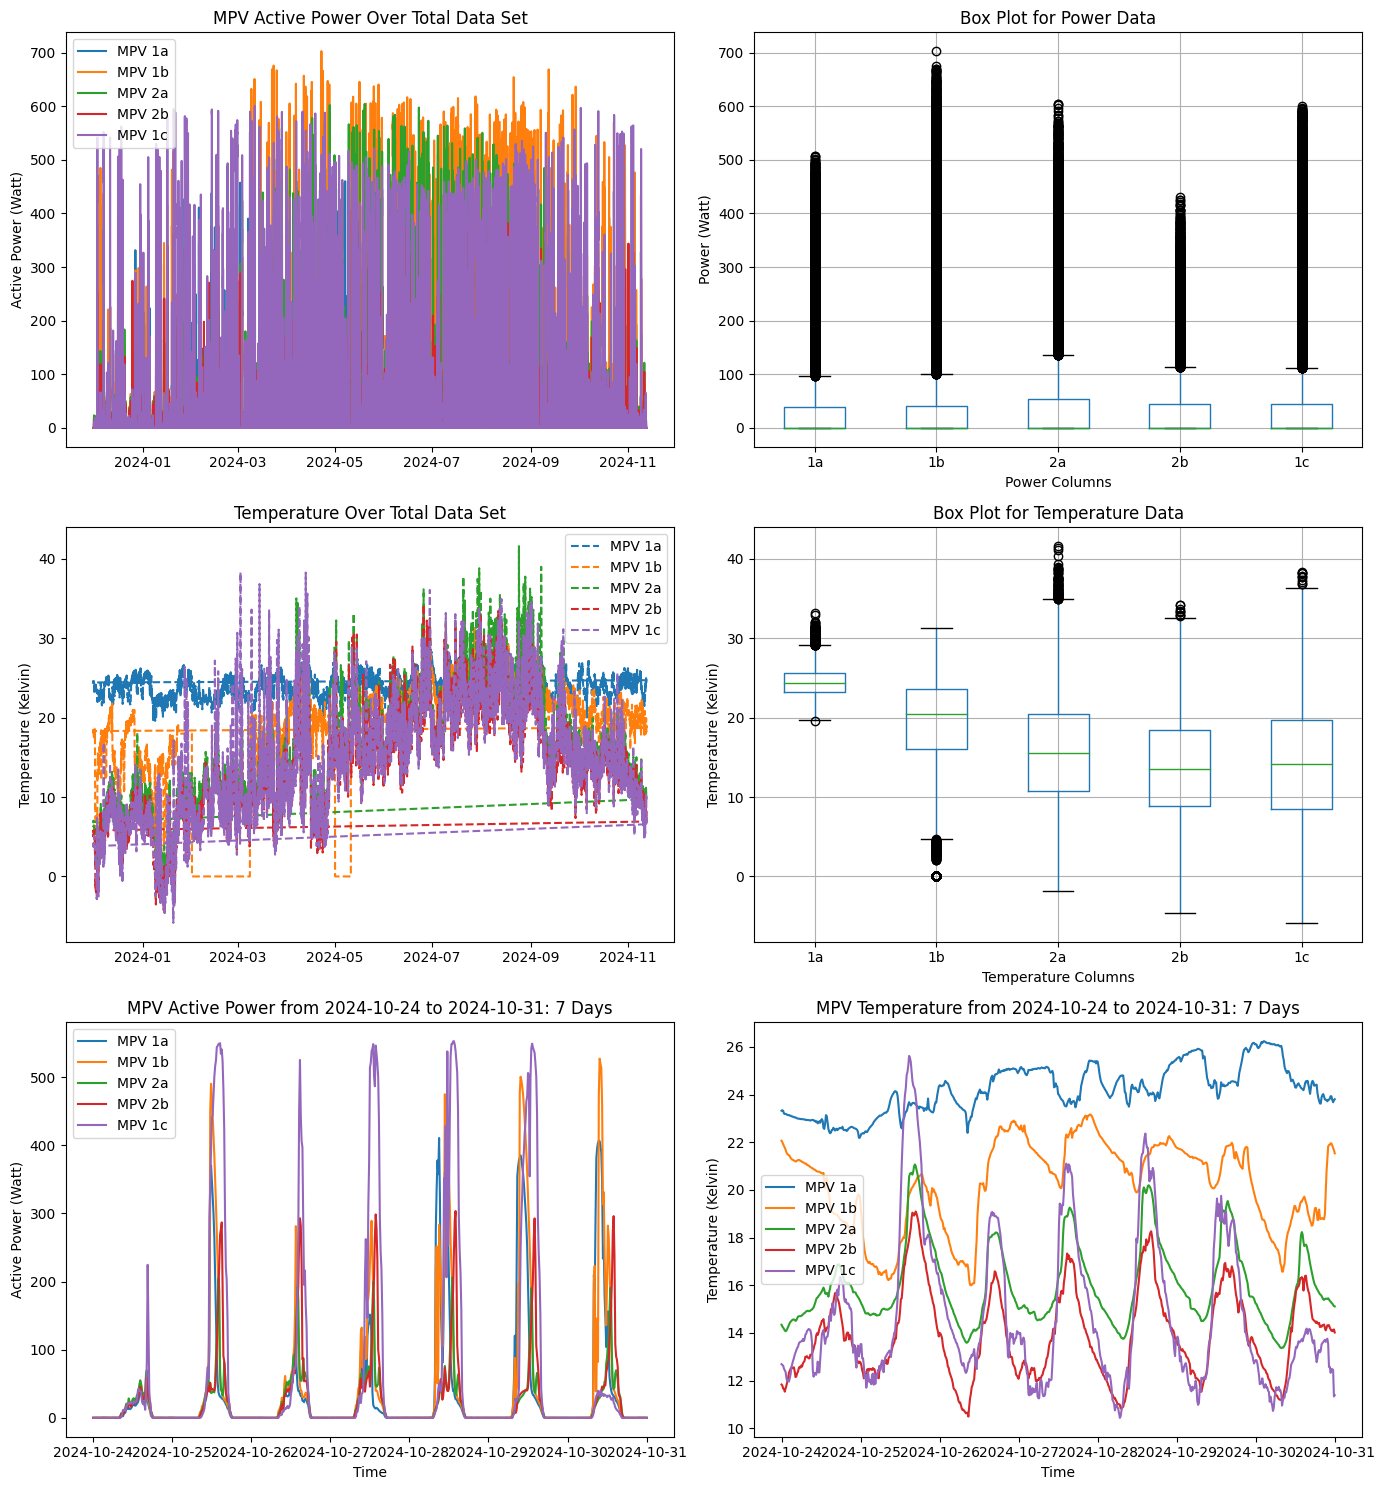

In [6]:
# Create a new figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Plot Active Power
for col in df_power.columns[1:]:
    axs[0, 0].plot(df_power['time'], df_power[col], label=f'MPV {col}')
axs[0, 0].set_ylabel('Active Power (Watt)')
axs[0, 0].set_title('MPV Active Power Over Total Data Set')
axs[0, 0].legend()

# Plot Temperature
for col in df_temp.columns[1:]:
    axs[1, 0].plot(df_temp['time'], df_temp[col], label=f'MPV {col}', linestyle='--')
axs[1, 0].set_ylabel('Temperature (Kelvin)')
axs[1, 0].set_title('Temperature Over Total Data Set')
axs[1, 0].legend()

# Plot Active Power for Specified Date Range
for col in df_power.columns[1:]:
    axs[2, 0].plot(df_power['time'].loc[mask_power], df_power[col].loc[mask_power], label=f'MPV {col}')
axs[2, 0].set_xlabel('Time')
axs[2, 0].set_ylabel('Active Power (Watt)')
axs[2, 0].set_title(f'MPV Active Power from {start_date} to {end_date}: {date_difference} Days')
axs[2, 0].legend()

# Box Plot for Power Data
df_power.iloc[:, 1:].boxplot(ax=axs[0, 1])
axs[0, 1].set_title('Box Plot for Power Data')
axs[0, 1].set_ylabel('Power (Watt)')
axs[0, 1].set_xlabel('Power Columns')

# Box Plot for Temperature Data
df_temp.iloc[:, 1:].boxplot(ax=axs[1, 1])
axs[1, 1].set_title('Box Plot for Temperature Data')
axs[1, 1].set_ylabel('Temperature (Kelvin)')
axs[1, 1].set_xlabel('Temperature Columns')

# Plot Temperature for Specified Date Range
for col in df_temp.columns[1:]:
    axs[2, 1].plot(df_temp['time'].loc[mask_power], df_temp[col].loc[mask_power], label=f'MPV {col}')
axs[2, 1].set_xlabel('Time')
axs[2, 1].set_ylabel('Temperature (Kelvin)')
axs[2, 1].set_title(f'MPV Temperature from {start_date} to {end_date}: {date_difference} Days')
axs[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

#### **Step 7: Conclusion** 

Congratulations! You have learned to load, analyze, and visualize power and temperature data. This knowledge can be applied in various domains, especially energy analysis and climate studies. Feel free to enhance the visualizations or integrate more data sources for a deeper analysis.